@Sanjaya Lohani


Collaborator: Joseph M. Lukens, Dan E. Jones, Ryan T. Glasser, Thomas A. Searles, and Brian T. Kirby


Papers:

1.   Lohani, S., Lukens, J.M., Jones, D.E., Searles, T.A., Glasser, R.T. and Kirby, B.T., 2021. Improving application performance with biased distributions of quantum states. *Physical Review Research*, 3(4), p.043145. 

2.  Lohani, S., Searles, T. A., Kirby, B. T., & Glasser, R. T. (2021). On the Experimental Feasibility of Quantum State Reconstruction via Machine Learning. *IEEE Transactions on Quantum Engineering*, 2, 1–10. 

*Please report bugs at slohani@mlphys.com





In [ ]:
!pip install mlphys

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 18.0 MB 672 kB/s 
     |████████████████████████████████| 238 kB 58.4 MB/s 
     |████████████████████████████████| 200 kB 57.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 34.3 MB/s 
     |████████████████████████████████| 943 kB 57.9 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 3.6 MB 23.5 MB/s 
     |████████████████████████████████| 112 kB 75.1 MB/s 
  Created wheel for mlphys: filename=mlphys-0.0.20-py3-none-any.whl size=10020 sha256=febff4d28b05e9d0d9a51aa50be986347fabd52325608eb83b1a274b5498b0d2
  Stored in directory: /root/.cache/pip/wheels/b3/84/67/028db79dd800f32e1ec9b3b057c5cde34626cb03f904e0

In [ ]:
import deepqis.Simulator.Distributions as dist
import deepqis.Simulator.Measurements as meas
import matplotlib.pyplot as plt
import deepqis.utils.Alpha_Measure as find_alpha
import deepqis.utils.Concurrence_Measure as find_con
import deepqis.utils.Purity_Measure as find_pm

#1. Mai-Alquier (MA) distributions
$\text{Dir}(x\vert\alpha)=\frac{\Gamma\left(\sum_{j=1}^{K}\alpha_{j}\right)}{\prod_{j=1}^{K}\Gamma(\alpha_{j})}\prod_{j=1}^{K}x_{j}^{\alpha_{j}-1}$,

$\rho=\sum_{j=1}^{K}x_{j}\vert\psi_{j}\rangle\langle\psi_{j}\vert$.

### 1. 1. Symmetric MA distributions

In [ ]:
alpha_value = 0.1 # say
density_matrix_ma = dist.MaiAlquierDist_Symmetric(qs=2, alpha=alpha_value).sample_dm(n_size=30000)

print(density_matrix_ma.shape)

(30000, 4, 4)


In [ ]:
# Find purity distributions

pur_dist = find_pm.purity(density_matrix_ma)
print(pur_dist)

[0.73075254 0.84615596 0.73847624 ... 0.89385197 0.90868361 0.98259922]


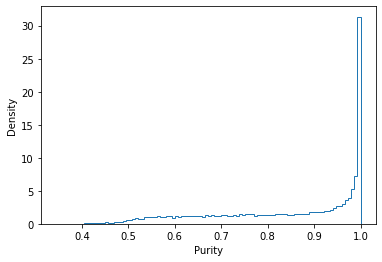

In [ ]:
# plot the purity distributions
plt.hist(pur_dist, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

### 1. 1. 2 Asymmetric MA distributions

In [ ]:

alpha_vec = [0.1, 0.2, 0.3, 0.4] # say
density_matrix_ma_asym = dist.MaiAlquierDist_Asymmetric(qs=2, alpha=alpha_vec).sample_dm(n_size=30000)

print(density_matrix_ma_asym.shape)

(30000, 4, 4)


In [ ]:
# Find purity distributions

pur_dist_asym = find_pm.purity(density_matrix_ma_asym)
print(pur_dist)

[0.73075254 0.84615596 0.73847624 ... 0.89385197 0.90868361 0.98259922]


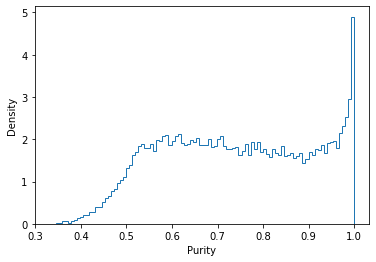

In [ ]:
# plot the purity distributions
plt.hist(pur_dist_asym, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

#2. Hilbert-Schmidt (HS) distributions
$\rho=\frac{GG^{\dagger}}{\text{Tr}\left(GG^{\dagger} \right)}$

In [ ]:
dm_hs = dist.Hilbert_Schmidt(qs=2).sample_dm(n_size=30000)
print(dm_hs.shape)

(30000, 4, 4)


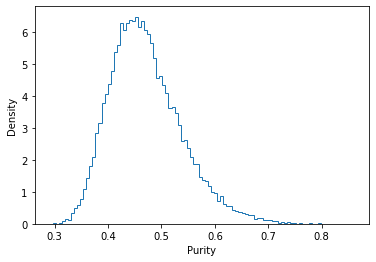

In [ ]:
pur_hs = find_pm.purity(dm_hs)
plt.hist(pur_hs, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

#### $MA_{\alpha=D=K}$ vs HS:

Please see Fig. 3 in the Paper (1) above for more details.

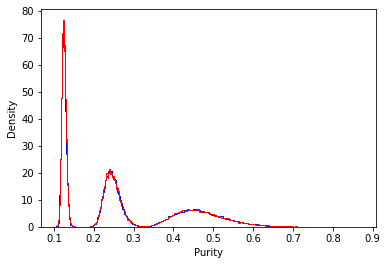

In [ ]:
import tensorflow as tf
# MA: red line
# HS: blue line

ma_pur_list = []
hs_pur_list = []
for qubits in [2, 3, 4]:
  qubits_tensor = tf.constant(qubits)
  alpha_value = tf.cast(2**qubits_tensor, tf.float32)
  ma_gen = dist.MaiAlquierDist_Symmetric(qs=qubits, alpha=alpha_value).sample_dm(n_size=30000)
  ma_pur = find_pm.purity(ma_gen)
  ma_pur_list.append(ma_pur)
  hs_gen = dist.Hilbert_Schmidt(qs=qubits).sample_dm(n_size=30000)
  hs_pur = find_pm.purity(hs_gen)
  hs_pur_list.append(hs_pur)
for i in range(3):
  plt.hist(hs_pur_list[i],bins=100, histtype='step', density=True, color='b')
  plt.hist(ma_pur_list[i],bins=100, histtype='step', density=True, color='r')
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()

#3. Bures distributions

$\rho=\frac{\left({1}+U\right)GG^{\dagger}\left({1}+U^{\dagger}\right)}{\text{Tr}\left[\left({1}+U\right)GG^{\dagger}\left({1}+U^{\dagger}\right)\right]}$

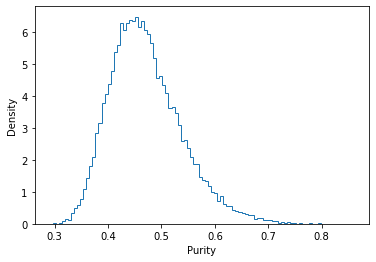

In [ ]:
bures = dist.Bures(qs=2).sample_dm(n_size=30000)
pur_bures = find_pm.purity(bures)
plt.hist(pur_hs, bins=100, histtype='step', density=True)
plt.xlabel('Purity')
plt.ylabel('Density')
plt.show()